In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from myutils import Helpers as h
from myutils import Complexity_Measures as cm
from myutils import Datasets as ds


#Magic Command, so changes in myutils module are reloaded
%load_ext autoreload
%autoreload 1
%aimport myutils


In [36]:
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Autoencoder(Model):
  def __init__(self, shape):
    super(Autoencoder, self).__init__()
    flattendim = shape[1] * shape[2]
    latent_dim = int(flattendim/2)
    print("latent_dim",latent_dim)
    self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
        layers.Dense(flattendim,activation='sigmoid'),
        layers.Reshape((shape[1],shape[2]))
    ])
    self.compile(optimizer='adam', loss=losses.MeanSquaredError())
    

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [2]:
data = ds.get_all_data()

In [3]:
for dataset in data:
    print(dataset, data[dataset]["x_train"].shape)

ALL_NUMBERS (60000, 28, 28)
SIX_AND_NINES (11867, 28, 28)
ONLY_SIXES (5918, 28, 28)
RANDOM (60000, 28, 28)
SAMEPICTURE (60000, 28, 28)


In [43]:
for dataset in data:
    data[dataset]["x_train"] = data[dataset]["x_train"][:5918]
    data[dataset]["y_train"] = data[dataset]["y_train"][:5918]
    data[dataset]["x_train"] = data[dataset]["x_train"] / 255


In [5]:
for dataset in data:
    print(dataset, data[dataset]["x_train"].shape)


ALL_NUMBERS (5918, 28, 28)
SIX_AND_NINES (5918, 28, 28)
ONLY_SIXES (5918, 28, 28)
RANDOM (5918, 28, 28)
SAMEPICTURE (5918, 28, 28)


In [6]:
for dataset in data:

    data_train = data[dataset]["x_train"]

    autoencoder = Autoencoder((28*28)/2)

    print("fitting dataset",dataset)
    hist = autoencoder.fit(data_train, data_train,
                        epochs=1,
                        batch_size=1,
                        shuffle=False)
    data[dataset]["loss"] = hist.history['loss'][0] * 100




2021-11-16 20:16:13.043899: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-16 20:16:13.157534: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


fitting dataset ALL_NUMBERS
5918/5918 [==============================] - 13s 2ms/step - loss: 0.0158
fitting dataset SIX_AND_NINES
5918/5918 [==============================] - 13s 2ms/step - loss: 0.0132
fitting dataset ONLY_SIXES
5918/5918 [==============================] - 14s 2ms/step - loss: 0.0121
fitting dataset RANDOM
5918/5918 [==============================] - 15s 2ms/step - loss: 0.0834
fitting dataset SAMEPICTURE
5918/5918 [==============================] - 13s 2ms/step - loss: 2.5319e-04


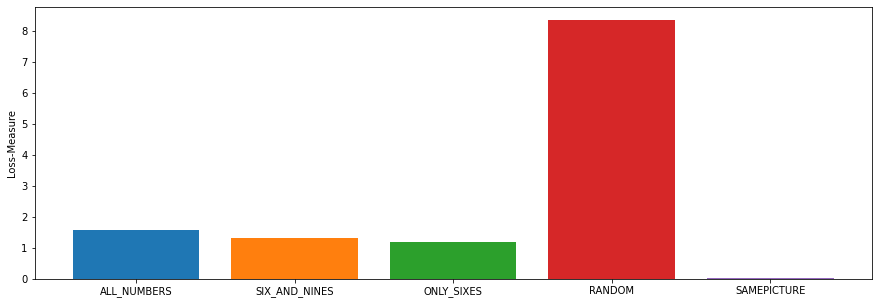

In [9]:
plt.figure(figsize=(15, 5))
for dataset in data:
    plt.bar(dataset, data[dataset]["loss"])
plt.ylabel("Loss-Measure")
plt.show()

Hier auch wieder keine Einbeziehung der Labels -> eher ein measure für wie unterschiedlich sind die Bilder

Müssen label miteinbezogen werden?

weitere expertiment: 6 und 9 sollte schwieriger sein als 1,8

In [40]:
for dataset in data:
    data[dataset]["x_train_pca"] = h.PCA(data[dataset]["x_train"],n_components=4)
    d_set_pca = data[dataset]["x_train_pca"]

    autoencoder = Autoencoder(shape=d_set_pca.shape)

    print("fitting dataset", dataset, "PCA")
    hist = autoencoder.fit(d_set_pca, d_set_pca,
                           epochs=1,
                           batch_size=1,
                           shuffle=False)
    data[dataset]["loss_pca"] = hist.history['loss'][0] * 100


latent_dim 2
fitting dataset ALL_NUMBERS PCA
5918/5918 [==============================] - 5s 730us/step - loss: 3.4336
latent_dim 2
fitting dataset SIX_AND_NINES PCA
5918/5918 [==============================] - 5s 772us/step - loss: 3.7066
latent_dim 2
fitting dataset ONLY_SIXES PCA
5918/5918 [==============================] - 5s 786us/step - loss: 3.8635
latent_dim 2
fitting dataset RANDOM PCA
5918/5918 [==============================] - 5s 751us/step - loss: 0.1750


/Users/felixbieswanger/Desktop/Uni_Stuff/KIT/Master/Module/QML/Code/masKIT/venv/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()


latent_dim 2
fitting dataset SAMEPICTURE PCA
5918/5918 [==============================] - 6s 922us/step - loss: 0.0189


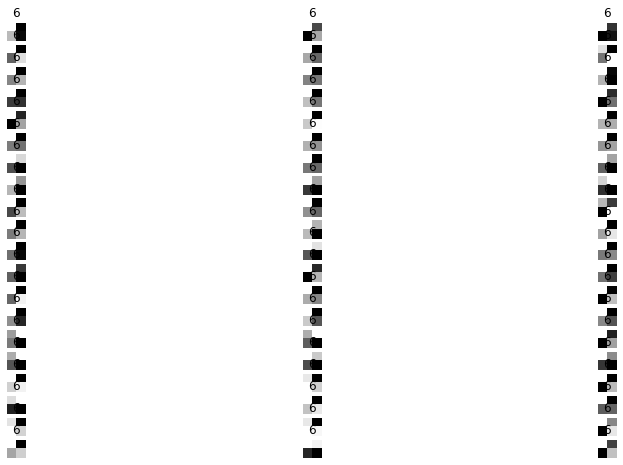

In [49]:
# get sixes and plot them
sechsen = data["SIX_AND_NINES"]["x_train_pca"][(data["SIX_AND_NINES"]["y_train"] == 6)]
h.plot_grid(sechsen, labels=data["SIX_AND_NINES"]["y_train"][(
    data["SIX_AND_NINES"]["y_train"] == 6)], rows=20, cols=3)
